In [51]:
import numpy as np
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import glob
import re
import shap

from config.config import *
#from analysis.analysis_functions import *
from model.CustomActorCriticNets import *

In [73]:
backdf = pd.read_csv("data/preprocessed/US_stocks_WDB.csv", index_col=0)
backdf = backdf[(backdf["datadate"]>= 20000101)&(backdf["datadate"]<=20081231)]
backdf["datadate"] = pd.to_datetime(backdf["datadate"], format='%Y%m%d')

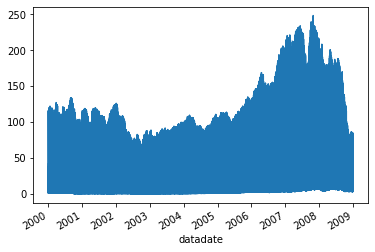

In [75]:
backdf.set_index("datadate")["adjcp"].plot()
plt.show()

In [79]:
backdf[backdf.datadate>="2000-01-01"]

,datadate,tic,adjcp,high,low,volume,macd,rsi_30,cci_30,dx_30,ret_vola_7d,return_daily,log_return_daily,ret_vola_21d,ret_vola_63d
1263,2000-01-03,AAPL,0.999442,1.004464,0.907924,4783300.0,0.020676,61.890875,96.374508,29.030634,0.041159,0.088754,0.085034,0.037706,0.039918
7921,2000-01-03,AMGN,62.937500,70.000000,62.875000,22916100.0,4.433505,67.222606,219.105316,48.280407,0.055611,0.047867,0.046756,0.040388,0.033829
14579,2000-01-03,AXP,52.416667,54.833333,52.000000,1887700.0,0.758946,52.521632,25.502417,0.885386,0.027691,-0.054135,-0.055656,0.021863,0.024413
21238,2000-01-03,BA,40.562500,41.687500,39.812500,2637100.0,0.091544,48.242056,29.946176,3.613303,0.020398,-0.021116,-0.021342,0.021983,0.023994
27896,2000-01-03,CAT,24.312500,24.500000,23.843750,2527500.0,-0.376621,47.627127,90.674827,5.006491,0.019601,0.033201,0.032661,0.023378,0.027229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162231,2008-12-31,UNH,26.600000,27.310000,26.200000,5584527.0,1.442635,56.427712,110.663290,17.178618,0.029984,-0.016272,-0.016406,0.035291,0.067584
168890,2008-12-31,VZ,33.900000,34.340000,33.030000,16346630.0,0.640586,54.322490,75.765996,11.874759,0.011994,0.020163,0.019962,0.022704,0.044480
175549,2008-12-31,WBA,24.670000,24.850000,23.940000,6572553.0,-0.161143,47.095138,-11.160032,2.717726,0.025650,0.030493,0.030037,0.024113,0.041749
182207,2008-12-31,WMT,56.060000,56.330000,54.770000,13881800.0,0.249687,51.466857,55.213376,7.794387,0.009468,0.018347,0.018181,0.016539,0.032379


In [93]:
DFF = backdf[backdf.tic=="AAPL"]["adjcp"].pct_change(1)[1:]
DFF

1264   -0.084310
1265    0.014634
1266   -0.086538
1267    0.047368
1268   -0.017588
          ...   
3521   -0.015513
3522    0.009055
3523    0.009323
3524   -0.003695
3525   -0.010893
Name: adjcp, Length: 2262, dtype: float64

In [119]:
DFF[DFF== 0]

1405    0.0
1464    0.0
1470    0.0
1499    0.0
1513    0.0
1515    0.0
1530    0.0
1541    0.0
1551    0.0
1682    0.0
1698    0.0
1728    0.0
1748    0.0
1864    0.0
1929    0.0
2017    0.0
2042    0.0
2221    0.0
2321    0.0
2342    0.0
2370    0.0
2615    0.0
2857    0.0
3290    0.0
Name: adjcp, dtype: float64

In [103]:
DFF1 = DFF[DFF < np.mean(DFF)]

In [105]:
DFF1

1264   -0.084310
1266   -0.086538
1268   -0.017588
1269   -0.051151
1270   -0.059973
          ...   
3516   -0.065703
3519   -0.047333
3521   -0.015513
3524   -0.003695
3525   -0.010893
Name: adjcp, Length: 1160, dtype: float64

In [106]:
mean = np.mean(DFF)
mean

0.001072271752910615

In [107]:
DFF1-mean

1264   -0.085383
1266   -0.087611
1268   -0.018660
1269   -0.052223
1270   -0.061045
          ...   
3516   -0.066775
3519   -0.048406
3521   -0.016585
3524   -0.004767
3525   -0.011966
Name: adjcp, Length: 1160, dtype: float64

In [117]:
DFF[DFF==0]

1405    0.0
1464    0.0
1470    0.0
1499    0.0
1513    0.0
1515    0.0
1530    0.0
1541    0.0
1551    0.0
1682    0.0
1698    0.0
1728    0.0
1748    0.0
1864    0.0
1929    0.0
2017    0.0
2042    0.0
2221    0.0
2321    0.0
2342    0.0
2370    0.0
2615    0.0
2857    0.0
3290    0.0
Name: adjcp, dtype: float64

In [115]:
np.log(DFF/DFF.shift(-1))

divide by zero encountered in log
invalid value encountered in log


1264         NaN
1265         NaN
1266         NaN
1267         NaN
1268   -1.067567
          ...   
3521         NaN
3522   -0.029207
3523         NaN
3524   -1.081260
3525         NaN
Name: adjcp, Length: 2262, dtype: float64

In [109]:
np.mean((mean-DFF1)**2)

0.0011374001746637902

In [ ]:
 df["daily_ret"][df["daily_ret"]<df["daily_ret"].mean()].values

In [ ]:
abspath = r"C:\Users\Andy\PycharmProjects\finrlpaper2\MT-DRL-Pytorch"
os.chdir(abspath)
cwd_ = os.getcwd() # get current working directory
cwd_

In [ ]:
results_path = "results"
run_path = os.path.join(results_path, "07-09-2021_04-00-06_ppoCustomBase_fm2_st")
seed = 0
seed_path = os.path.join(run_path, "agentSeed0")

states = pd.read_csv(os.path.join("results", "07-09-2021_04-00-06_ppoCustomBase_fm2_st", "randomSeed0", "state_memory", "state_memory_train_ppoCustomBase_ep21_totalSteps_63_finalStateCounter_2.csv"), index_col=0)
bg = torch.as_tensor(np.array(states.drop(columns="datadate")), dtype=torch.float)[0:40]
tg = torch.as_tensor(np.array(states.drop(columns="datadate")), dtype=torch.float)[40:]

In [ ]:
bg_minusone = torch.as_tensor(np.array(states.drop(columns="datadate")), dtype=torch.float)[0:-1]
tg_one = torch.as_tensor(np.array(states.drop(columns="datadate")), dtype=torch.float)[-1:]

In [ ]:
tg_one[0][0]

In [ ]:
bg_minusone.shape

In [ ]:
tg_one.shape

In [ ]:
brain = BrainActorCritic(observations_size=27*7+27+1, actions_num=27)
brain.load_state_dict(torch.load(os.path.join("trained_models", "07-09-2021_04-00-06_ppoCustomBase_rew_addPFVal_fm2_st", "randomSeed0","ppoCustomBase_trainTimesteps_128_ep21_trainBeginning_5221_trainEnding_5284")))

In [ ]:
explainer = shap.DeepExplainer(brain, bg_minusone, choose_output_idx=0)

In [ ]:
shap_values = explainer.shap_values(tg)

In [ ]:
shap_values_one = explainer.shap_values(tg_one)

In [ ]:
print(len(shap_values_one)) # number of actions (outputs) for which shap values were predicted
print(len(shap_values_one[0])) # for each actions vector, there are 24 observations (that were passed as examples to
# shap explainer), so for each of these there are values for each of the 217 input values
print(len(shap_values_one[0][0])) # 217 input values
print(shap_values_one[0][0][0])
# so shap values are predicted for each action (output node) and within there are predictions for ecah input sample
# and within the input sample for each fetaure passed to the model
print(explainer.expected_value)

In [ ]:
len(explainer.expected_value)

In [ ]:
len(shap_values_one[0])

In [ ]:
shap.summary_plot(shap_values = shap_values[0][0],
                  features = tg_one
                  )

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values_one[0][0], tg_one)

In [2]:
abspath = r"C:\Users\Andy\PycharmProjects\finrlpaper2\MT-DRL-Pytorch"
os.chdir(abspath)
cwd_ = os.getcwd() # get current working directory
cwd_

'C:\\Users\\Andy\\PycharmProjects\\finrlpaper2\\MT-DRL-Pytorch'

In [3]:
results_path = "results"
run_path = os.path.join(results_path, "07-09-2021_04-00-06_ppoCustomBase_fm2_st")
seed = 0
seed_path = os.path.join(run_path, "agentSeed0")

states = pd.read_csv(os.path.join("results", "07-09-2021_04-00-06_ppoCustomBase_fm2_st", "randomSeed0", "state_memory", "state_memory_train_ppoCustomBase_ep21_totalSteps_63_finalStateCounter_2.csv"), index_col=0)
bg = torch.as_tensor(np.array(states.drop(columns="datadate")), dtype=torch.float)[0:40]
tg = torch.as_tensor(np.array(states.drop(columns="datadate")), dtype=torch.float)[40:]

In [19]:
bg_minusone = torch.as_tensor(np.array(states.drop(columns="datadate")), dtype=torch.float)[0:-1]
tg_one = torch.as_tensor(np.array(states.drop(columns="datadate")), dtype=torch.float)[-1:]

In [31]:
tg_one[0][0]

tensor(39846.9180)

In [20]:
bg_minusone.shape

torch.Size([63, 217])

In [21]:
tg_one.shape

torch.Size([1, 217])

In [22]:
brain = BrainActorCritic(observations_size=27*7+27+1, actions_num=27)
brain.load_state_dict(torch.load(os.path.join("trained_models", "07-09-2021_04-00-06_ppoCustomBase_rew_addPFVal_fm2_st", "randomSeed0","ppoCustomBase_trainTimesteps_128_ep21_trainBeginning_5221_trainEnding_5284")))

<All keys matched successfully>

In [23]:
explainer = shap.DeepExplainer(brain, bg_minusone, choose_output_idx=0)

manual device setting to cpu


In [27]:
shap_values = explainer.shap_values(tg)

In [33]:
shap_values_one = explainer.shap_values(tg_one)

In [34]:
print(len(shap_values_one)) # number of actions (outputs) for which shap values were predicted
print(len(shap_values_one[0])) # for each actions vector, there are 24 observations (that were passed as examples to
# shap explainer), so for each of these there are values for each of the 217 input values
print(len(shap_values_one[0][0])) # 217 input values
print(shap_values_one[0][0][0])
# so shap values are predicted for each action (output node) and within there are predictions for ecah input sample
# and within the input sample for each fetaure passed to the model
print(explainer.expected_value)

27
1
217
-0.00027177081210538745
[-0.22008479  0.08239274  0.3203949  -0.14406383 -0.11197822  0.12157014
 -0.01726682  0.3194537  -0.06413664  0.13375722  0.02483165 -0.40680727
  0.07405768  0.32040083  0.2636773  -0.12568444 -0.32062644  0.25290367
 -0.10833761 -0.22954248 -0.0881638  -0.2813219  -0.30760846  0.05873528
 -0.08670276 -0.28587237 -0.06167864]


In [39]:
len(explainer.expected_value)

27

In [50]:
len(shap_values_one[0])

1

In [47]:
shap.summary_plot(shap_values = shap_values[0][0],
                  features = tg_one
                  )

AssertionError: Summary plots need a matrix of shap_values, not a vector.

In [45]:
shap.force_plot(explainer.expected_value[0], shap_values_one[0][0], tg_one)

Exception: Length of features is not equal to the length of shap_values!

In [57]:
shap.force_plot(base_value = explainer.expected_value[0],
                shap_values = shap_values[0],
                features = tg
                )

TypeError: Object of type Tensor is not JSON serializable

In [19]:
shap.force_plot(e.expected_value[0], np.concatenate([shap_values[0][0], shap_values[0][1]], axis=1)[i])

AxisError: axis 1 is out of bounds for array of dimension 1

In [34]:
#shap_values[0][0] # len 217

In [35]:
shap_values[0][1]

array([-1.65704732e-05,  2.89176363e-08,  4.80306319e-08, -2.07583753e-07,
        6.45848388e-08,  1.64281175e-08,  2.28817463e-08,  1.05095879e-07,
        7.37988586e-08, -1.82065796e-09, -1.11253708e-08,  2.92557871e-07,
       -2.24995116e-08, -1.13692636e-07,  9.88864901e-09,  6.16841248e-07,
       -3.38305961e-09,  3.47575080e-09, -2.31753674e-08, -2.27608172e-08,
        2.55893440e-08,  1.01430517e-08, -8.52931947e-08,  1.74173014e-08,
        3.77772196e-08, -7.59329595e-08,  1.27201378e-08, -1.30343043e-08,
       -1.27864941e-09,  5.61117153e-10, -4.10396295e-09, -2.03009485e-08,
       -2.22615371e-09,  8.04539213e-10,  3.92617050e-09,  4.37058029e-11,
        7.90813992e-09,  7.54016072e-10, -2.85481550e-09, -2.50933185e-09,
       -1.16848575e-09, -2.52769849e-09,  3.76340875e-10, -4.25851937e-10,
        5.73983694e-10,  5.27175303e-10, -7.08070380e-10, -5.80585927e-11,
        1.45142998e-09,  5.87567239e-09,  3.75120424e-09,  6.16798890e-10,
        1.26352734e-10,  

In [25]:
for param in brain.parameters():
    print(param)

Parameter containing:
tensor([[ 0.0211,  0.0204,  0.1280,  ..., -0.0383, -0.0719,  0.0346],
        [-0.0690,  0.0577, -0.0210,  ..., -0.0902, -0.0038,  0.1099],
        [ 0.1178,  0.0454,  0.0100,  ..., -0.1135,  0.0594, -0.0989],
        ...,
        [-0.0274, -0.0443,  0.1487,  ..., -0.0851, -0.0518, -0.0388],
        [-0.0158,  0.1290,  0.0741,  ...,  0.0167, -0.0017,  0.1001],
        [ 0.0057,  0.0110, -0.0343,  ..., -0.0714,  0.0240,  0.0008]],
       requires_grad=True)
Parameter containing:
tensor([-0.0188,  0.0066,  0.0143,  0.0043,  0.0127, -0.0175,  0.0091, -0.0134,
        -0.0141,  0.0155,  0.0128, -0.0146,  0.0134,  0.0147, -0.0180,  0.0129,
        -0.0108,  0.0064, -0.0083, -0.0166,  0.0035, -0.0165,  0.0216,  0.0125,
        -0.0037,  0.0111, -0.0023, -0.0081,  0.0147, -0.0203, -0.0184,  0.0192,
        -0.0075, -0.0097, -0.0140,  0.0149, -0.0188, -0.0129,  0.0160, -0.0126,
         0.0127, -0.0134, -0.0098,  0.0087, -0.0133,  0.0031,  0.0143, -0.0063,
        -0.0150